In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/PyPSA_Africa_images/cycle/pytorch-CycleGAN-and-pix2pix/')

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

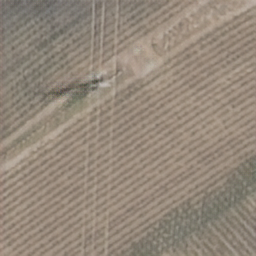

In [ ]:
path = os.path.join(os.getcwd(), 'checkpoints/maxar2duke/web/images/')
img = cv2.imread(os.path.join(path, 'epoch038_idt_B.png'))
cv2_imshow(img)

In [ ]:
import IPython
html_path = '/content/drive/My Drive/PyPSA_Africa_images/cycle/pytorch-CycleGAN-and-pix2pix/checkpoints/maxar2duke/web/index.html'
IPython.display.HTML(filename=html_path)

real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A
real_A,fake_B,rec_A,idt_B,real_B,fake_A,rec_B,idt_A


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 6.8 MB/s 
     |████████████████████████████████| 1.7 MB 44.6 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 140 kB 56.5 MB/s 
     |████████████████████████████████| 180 kB 56.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=61e1223e69a7ebf3f0a3286cb7f02f03f9766bad39948e24047c8c7f39eeeacc
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=7da03dfc8f8ac302942b0c0041c42ea9720bb39271e15332d2c83833c918749c
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl 

In [ ]:
# !bash ./datasets/download_cyclegan_dataset.sh horse2zebra

In [ ]:
datapath = os.path.join(os.getcwd(), 'datasets', 'horse2zebra')

In [ ]:
for dir in ['trainA', 'trainB', 'testA', 'testB']:
    print('In {}: {} examples.'.format(dir, len(os.listdir(os.path.join(datapath, dir)))))

In trainA: 1067 examples.
In trainB: 1334 examples.
In testA: 120 examples.
In testB: 140 examples.


In [ ]:
!ls datasets/

bibtex			      horse2zebra
combine_A_and_B.py	      make_dataset_aligned.py
download_cyclegan_dataset.sh  prepare_cityscapes_dataset.py
download_pix2pix_dataset.sh


In [ ]:
os.mkdir(os.path.join('datasets', 'maxar2duke'))

### setup training and testing images for maxar 2 duke

In [ ]:
train_num = 1500
test_num = 250
test_share = 0.12

our_datasets_path = '/content/drive/MyDrive/PyPSA_Africa_images/datasets/'
duke_train = os.path.join(our_datasets_path, 'duke_train', 'data')
duke_val = os.path.join(our_datasets_path, 'duke_val', 'data')
maxar_train = os.path.join(our_datasets_path, 'maxar_train', 'data')
maxar_val = os.path.join(our_datasets_path, 'maxar_val', 'data')

duke_train_images = os.listdir(duke_train)
duke_test_images = os.listdir(duke_val)
duke_train_images = [os.path.join(duke_train, img) for img in duke_train_images]
duke_test_images = [os.path.join(duke_val, img) for img in duke_test_images]

maxar_train_images = os.listdir(maxar_train)
maxar_test_images = os.listdir(maxar_val)
maxar_train_images = [os.path.join(maxar_train, img) for img in maxar_train_images]
maxar_test_images = [os.path.join(maxar_val, img) for img in maxar_test_images]

duke_images = duke_train_images + duke_test_images
maxar_images = maxar_train_images + maxar_test_images

In [ ]:
len(duke_images)

16315

In [ ]:
datapath = '/content/drive/My Drive/PyPSA_Africa_images/cycle/pytorch-CycleGAN-and-pix2pix/datasets/maxar2duke/'

In [ ]:
import numpy as np
from shutil import copyfile as cp




In [ ]:
train_dest

'/content/drive/My Drive/PyPSA_Africa_images/cycle/pytorch-CycleGAN-and-pix2pix/datasets/horse2zebra/trainA'

In [ ]:
'''

test_dest = os.path.join(datapath, 'testA')
train_dest = os.path.join(datapath, 'trainA')

for i, fn in enumerate(np.random.permutation(duke_images)):
    
    if i >= (train_num + test_num):
        break

    if np.random.rand() > test_share:
        cp(fn, os.path.join(train_dest, str(np.random.randint(1e10, 1e11))+'.png'))
        print(f'Copied duke img {i} to train!')

    else:
        cp(fn, os.path.join(test_dest, str(np.random.randint(1e10, 1e11))+'.png'))
        print(f'Copied duke img {i} to test!')
    
'''  
     

test_dest = os.path.join(datapath, 'testB')
train_dest = os.path.join(datapath, 'trainB')

for i, fn in enumerate(np.random.permutation(maxar_images)):
    
    if i >= (train_num + test_num):
        break

    if np.random.rand() > test_share:
        try:
            cp(fn, os.path.join(train_dest, str(np.random.randint(1e10, 1e11))+'.png'))
        except:
            continue
        print(f'Copied maxar img {i} to train!')

    else:
        try:
            cp(fn, os.path.join(test_dest, str(np.random.randint(1e10, 1e11))+'.png'))
        except:
            continue
        print(f'Copied maxar img {i} to test!')

Copied maxar img 0 to test!
Copied maxar img 1 to train!
Copied maxar img 2 to train!
Copied maxar img 3 to test!
Copied maxar img 4 to train!
Copied maxar img 5 to train!
Copied maxar img 6 to train!
Copied maxar img 7 to train!
Copied maxar img 8 to train!
Copied maxar img 9 to train!
Copied maxar img 10 to train!
Copied maxar img 11 to train!
Copied maxar img 12 to train!
Copied maxar img 13 to train!
Copied maxar img 14 to train!
Copied maxar img 15 to train!
Copied maxar img 16 to train!
Copied maxar img 17 to test!
Copied maxar img 18 to train!
Copied maxar img 19 to train!
Copied maxar img 20 to train!
Copied maxar img 21 to train!
Copied maxar img 22 to train!
Copied maxar img 23 to train!
Copied maxar img 24 to train!
Copied maxar img 25 to train!
Copied maxar img 26 to train!
Copied maxar img 27 to train!
Copied maxar img 28 to train!
Copied maxar img 29 to train!
Copied maxar img 30 to train!
Copied maxar img 31 to train!
Copied maxar img 32 to train!
Copied maxar img 33 to 

In [ ]:
np.random.permutation([1,2,3,4]).tolist()

[3, 2, 4, 1]

In [ ]:
1 iter
D_A: 0.635 G_A: 0.827 cycle_A: 1.734 idt_A: 0.729 D_B: 0.379 G_B: 0.359 cycle_B: 1.551 idt_B: 0.843

34 iter
D_A: 0.029 G_A: 0.986 cycle_A: 0.979 idt_A: 0.406 D_B: 0.099 G_B: 0.619 cycle_B: 0.768 idt_B: 0.348

74990066743

In [ ]:
!python train.py --dataroot ./datasets/maxar2duke --name maxar2duke --model cycle_gan --n_epochs 10

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/maxar2duke         	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
!python test.py --dataroot datasets/maxar2duke --name maxar2duke --no_dropout --model cycle_gan --direction BtoA

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/maxar2duke           	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
import matplotlib.pyplot as plt

base = './results/maxar2duke/test_latest/images/'
examples = os.listdir(base)

for i, fn in enumerate(examples):
    img = plt.imread(os.path.join(base, fn)) 
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.imshow(img)
    print('image: {}'.format(fn))
    plt.show()

    if i == 100:
        break
